<center>
<h1>Toma de contacto con RNNs</h1>
    <h2>Made with ❤️ by Emilio Pomares Porras (@emiliothehuman)</h2>
    </center>
<br><img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg">
<br><br>Nada mejor que un ejercicio inútil para familiarizarse con las RNN

In [2]:
# Importemos todas las librerías necesarias

import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.contrib.keras as keras
L = keras.layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reseteemos la sesión (importante cada vez que se cambia el grafo de tf o el modelo)

tf.keras.backend.clear_session()

In [4]:
# Definamos los datos de entrenamiento:
#   X <- secuencia de 0 a 999
#   Y <- X ^ 2

X_train = np.array(range(0,1000))[0:1000]
Y_train = X_train * 2
X_train = X_train.reshape(1000, 1, 1)
Y_train = Y_train.reshape(1000, 1)

In [5]:
# Número de neuronas en el interior de la celda RNN

HiddenUnits = 4

In [6]:
# Número de épocas

nEpochs = 1000

In [7]:
# Definamos el modelo: una sola unidad RNN simple, que tratará de predecir un escalar de salida
# a partir de un escalar de entrada y el estado anterior

model = Sequential()

model.add(L.SimpleRNN(HiddenUnits, input_shape=(1,1), return_sequences=False))
model.add(L.Dense(1))

In [8]:
# Definamos una clase descendiente de Callback para almacenar una historia de losses

class LossHistory(keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            
        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            
l = LossHistory()

In [9]:
# A compilar el modelo...

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [10]:
# Echemos un vistazo al modelo

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 4)                 24        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Los datos de validación son los mismos que los de entrenamiento en este caso, porque no tenemos
# datos de validación...

model.fit(X_train, Y_train, epochs=nEpochs, validation_data=(X_train, Y_train), callbacks=[l])

Train on 1000 samples, validate on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 1330292.9680 - acc: 1.0000e-03 - val_loss: 1330124.1161 - val_acc: 1.0000e-03
Epoch 2/1000
1000/1000 [==============================] - 0s 90us/step - loss: 1329974.0150 - acc: 1.0000e-03 - val_loss: 1329804.3833 - val_acc: 1.0000e-03
Epoch 3/1000
1000/1000 [==============================] - 0s 90us/step - loss: 1329381.1080 - acc: 1.0000e-03 - val_loss: 1329013.6267 - val_acc: 1.0000e-03
Epoch 4/1000
1000/1000 [==============================] - 0s 212us/step - loss: 1328867.0450 - acc: 1.0000e-03 - val_loss: 1328699.9590 - val_acc: 1.0000e-03
Epoch 5/1000
1000/1000 [==============================] - 0s 89us/step - loss: 1328550.6200 - acc: 1.0000e-03 - val_loss: 1328382.0253 - val_acc: 1.0000e-03
Epoch 6/1000
1000/1000 [==============================] - 0s 90us/step - loss: 1328229.3270 - acc: 1.0000e-03 - val_loss: 1328063.6481 - val_acc: 1.0000e-03
Epoch 7/10

Text(0.5, 1.0, 'Cost function over time (epochs)')

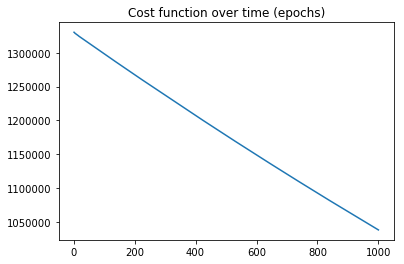

In [12]:
# Echemos un vistazo al coste en función de la época

x = range(1,len(l.losses)+1)
y = l.losses
plt.plot(x,y)
plt.title("Cost function over time (epochs)")

In [13]:
# A ver qué tal ha aprendido a predecir la secuencia

TryValue = 10

# debería precedir un valor cercano a TryValue * 2
model.predict(X_train[TryValue:TryValue+1])

array([[19.409994]], dtype=float32)

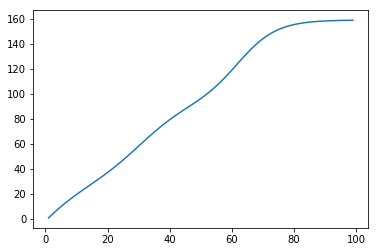

In [14]:
# Veamos un poco de la función que ha aprendido

x = np.arange(1,100)
y = model.predict(X_train[x])
plt.plot(x,y)